#### Binomial Logistic Regression (Two Inputs)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../assets/csv-files/suscription.csv")
dataset.head(3)

,Age,Salary,Purchase
0,22,33915,0
1,24,39183,0
2,32,54504,1


In [3]:
dataset.drop(columns=["Salary"], inplace=True) # Delete Salary column
dataset.head(3)

,Age,Purchase
0,22,0
1,24,0
2,32,1


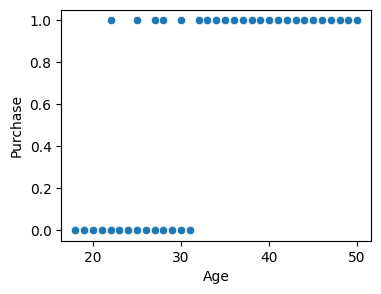

In [4]:
# Visualize the data
plt.figure(figsize=(4, 3))
sns.scatterplot(x="Age", y="Purchase", data=dataset)
plt.show()

In [5]:
# Select dependent and independent variables
x = dataset[["Age"]]
y = dataset["Purchase"]

In [6]:
# Train test split
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:

#Implement model
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()
lr.fit(x_train, y_train) # Train model

LogisticRegression()

In [10]:
lr.score(x_test, y_test) # Test model

0.99

In [11]:
lr.predict([[40]]) # New prediction

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

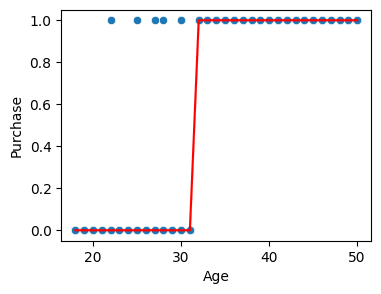

In [12]:
# Visulaize prediction line
plt.figure(figsize=(4, 3))
sns.scatterplot(x="Age", y="Purchase", data=dataset)
sns.lineplot(x="Age", y = lr.predict(x), data=dataset, color="red")
plt.show()

#### Binomial Logistic Regression (Multiple Inputs)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv("../assets/csv-files/suscription.csv")
dataset.head(3)

,Age,Salary,Purchase
0,22,33915,0
1,24,39183,0
2,32,54504,1


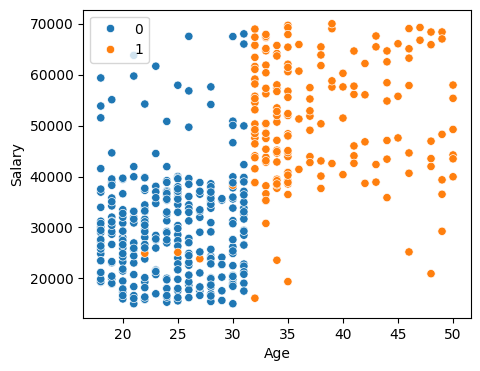

In [16]:
# Graphical visulaization
plt.figure(figsize=(5, 4))
sns.scatterplot(x="Age", y="Salary", data=dataset, hue="Purchase")
plt.legend(loc=2)
plt.show()

In [17]:
# Dependent and independent data
x = dataset.iloc[:, :-1]
y = dataset["Purchase"]

In [18]:
# Train test split
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Train your model
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [22]:
lr.score(x_test, y_test)

0.97

In [23]:
lr.predict([[36, 35000]])

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [24]:
# Visualization of prediction line
from mlxtend.plotting import plot_decision_regions

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


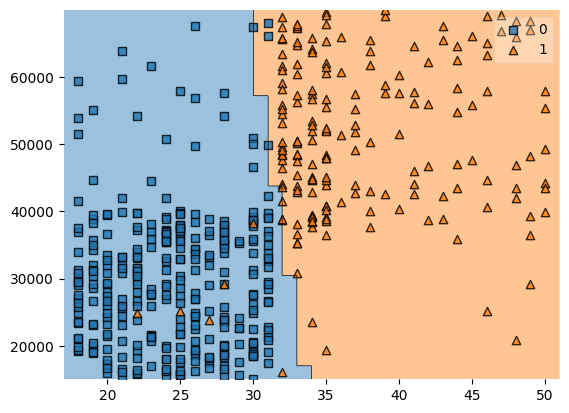

In [25]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

In [26]:
# Coefficients of Logistic regression equation
lr.coef_

array([[9.39666663e-01, 7.02923702e-05]])

In [27]:
# Constant of Logistic regression equation
lr.intercept_

array([-32.21032142])

#### Binomial Logistic Regression (Using PolynomialFeatures)
- This trains model on polynomial equation instead of linear.
- This is used for better accuracy of model.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset = pd.read_csv("../assets/csv-files/suscription.csv")
dataset.head(3)

,Age,Salary,Purchase
0,22,33915,0
1,24,39183,0
2,32,54504,1


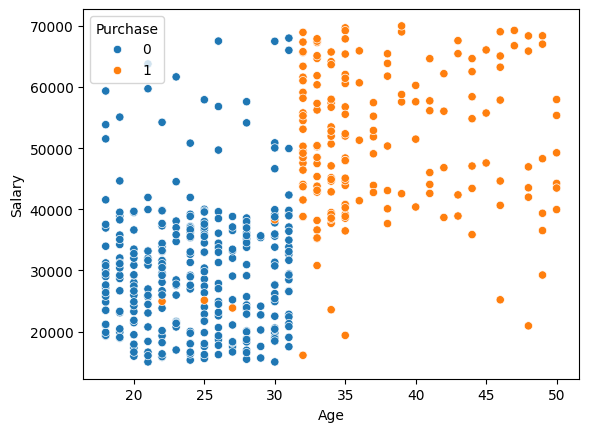

In [30]:
sns.scatterplot(x="Age", y="Salary", data=dataset, hue="Purchase")
plt.show()

In [31]:
# Seperate dependent and independent datas
x = dataset.iloc[:, :-1]
y = dataset["Purchase"]

In [32]:
# Polynomialize the independent data
from sklearn.preprocessing import PolynomialFeatures

In [33]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))
x.head(3)

,0,1,2,3,4,5
0,1.0,22.0,33915.0,484.0,746130.0,1.150227e+09
1,1.0,24.0,39183.0,576.0,940392.0,1.535307e+09
2,1.0,32.0,54504.0,1024.0,1744128.0,2.970686e+09


In [34]:
# Train test split
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
# Build the polynomial model
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [38]:
lr.score(x_test, y_test)

0.98

#### Multinomial Logistic Regression

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dataset = pd.read_csv("../assets/csv-files/iris-flower.csv")
dataset.head(3)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [42]:
dataset["Species"].unique() # Check for unique values

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

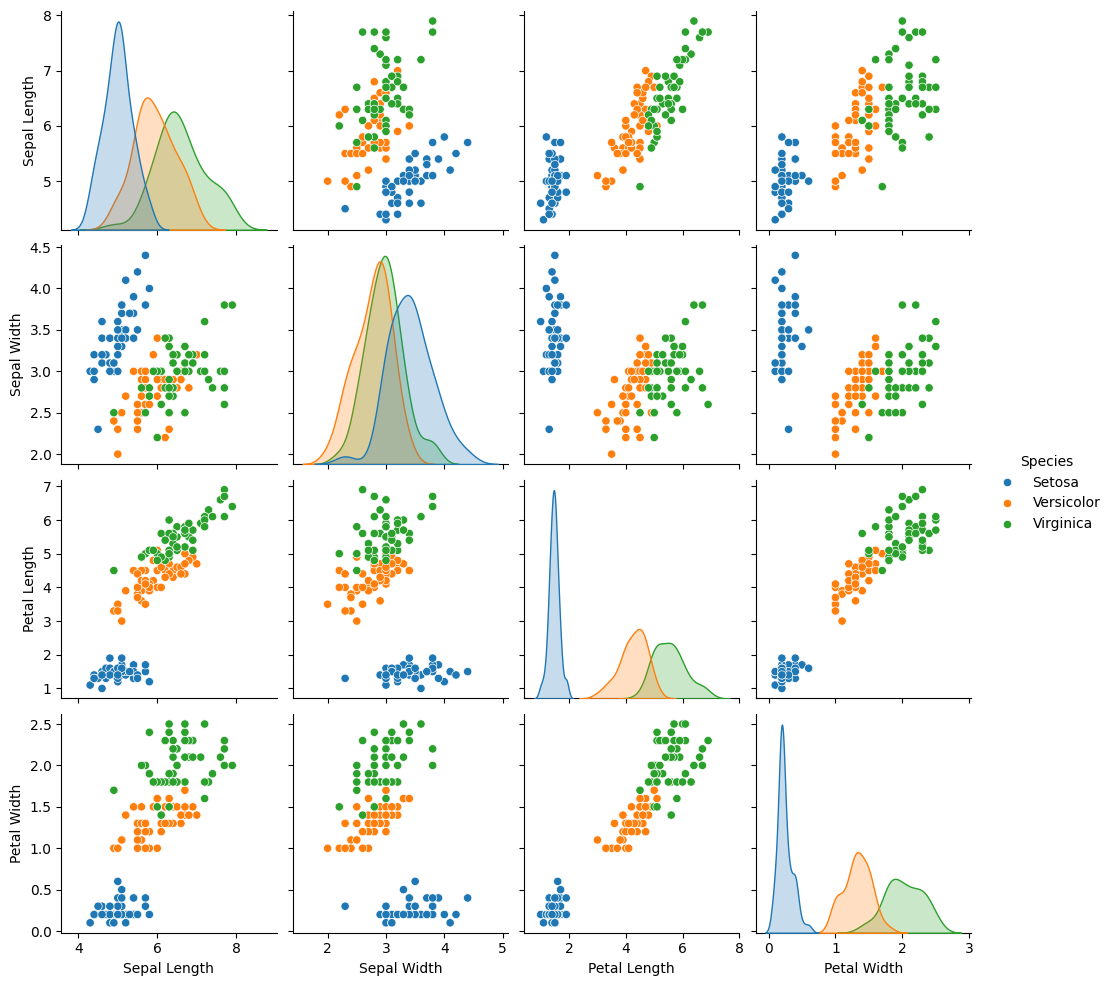

In [43]:
# Visualizing dataset
sns.pairplot(data=dataset, hue="Species")
plt.show()

In [44]:
# Seperate dependent and independent data
x = dataset.iloc[:, :-1]
y = dataset["Species"]

In [45]:
# Train test split
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Build model
from sklearn.linear_model import LogisticRegression

##### OVR Method

In [48]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train, y_train)

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [49]:
lr.score(x_test, y_test)

0.9666666666666667

##### Using Multinomial

In [50]:
lr = LogisticRegression(multi_class="multinomial")
lr.fit(x_train, y_train)

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [51]:
lr.score(x_test, y_test)

1.0